# Using LSTM to model 3 foreign exchange rates from 01/01/2010 to 31/12/2019 

## (1) GBP/USD prediction model

In [1]:
# Import relevant libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### Data pre-processing

In [2]:
# Load dataset
data_set = pd.read_csv('GBP_USD.csv')
data_set.head()

,Date,Price,Open,High,Low,Vol.,Change %
0,31/12/2019,1.3259,1.3117,1.3285,1.3106,97.86K,1.11%
1,30/12/2019,1.3113,1.3066,1.3152,1.3066,100.82K,0.28%
2,27/12/2019,1.3076,1.2992,1.3118,1.2967,85.56K,0.65%
3,26/12/2019,1.2992,1.2961,1.3017,1.2952,99.65K,0.25%
4,25/12/2019,1.2960,1.2943,1.2990,1.2921,34.43K,0.12%


In [3]:
data_set.tail()

,Date,Price,Open,High,Low,Vol.,Change %
2603,07/01/2010,1.5935,1.6011,1.6060,1.5894,NaN,-0.56%
2604,06/01/2010,1.6025,1.5991,1.6065,1.5938,NaN,0.17%
2605,05/01/2010,1.5998,1.6092,1.6156,1.5967,NaN,-0.62%
2606,04/01/2010,1.6097,1.6127,1.6242,1.6059,NaN,-0.45%
2607,01/01/2010,1.6170,1.6159,1.6170,1.6147,NaN,0.08%


In [4]:
data_set.shape

(2608, 7)

In [5]:
# Check datatype for each column
data_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2608 entries, 0 to 2607
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Date      2608 non-null   object 
 1   Price     2608 non-null   float64
 2   Open      2608 non-null   float64
 3   High      2608 non-null   float64
 4   Low       2608 non-null   float64
 5   Vol.      255 non-null    object 
 6   Change %  2608 non-null   object 
dtypes: float64(4), object(3)
memory usage: 142.8+ KB


In [6]:
# Checking for null Values
data_set.isnull().sum()

Date           0
Price          0
Open           0
High           0
Low            0
Vol.        2353
Change %       0
dtype: int64

The column 'Price' in the csv file represents closing exchange rate which is the standard benchmark used by investors to track its performance over time.

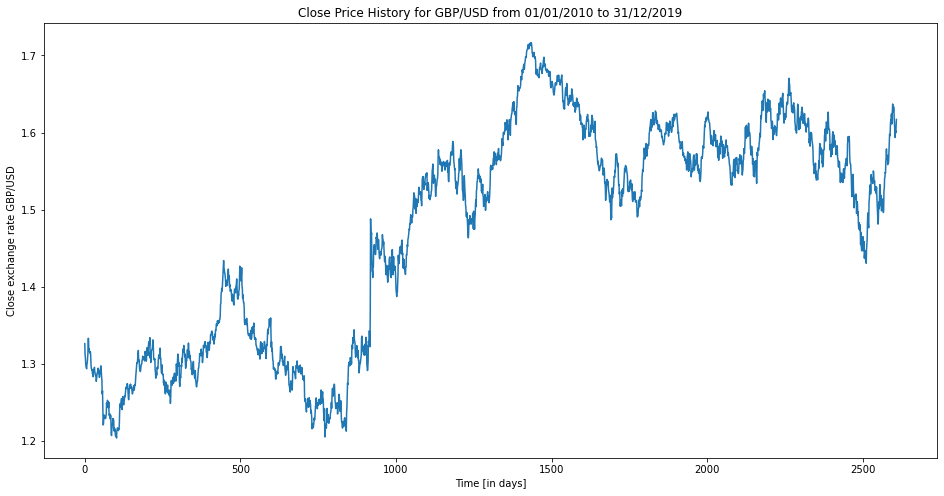

In [7]:
# Plot "Price" GBP/USD Exchange rate
plt.figure(figsize=(16,8))
plt.title('Close Price History for GBP/USD from 01/01/2010 to 31/12/2019')
plt.plot(data_set['Price'])
plt.xlabel('Time [in days]')
plt.ylabel('Close exchange rate GBP/USD')
plt.show()

In [8]:
# Create a data frame for "Price" column as exchange rate
df = data_set['Price']
print(df)

0       1.3259
1       1.3113
2       1.3076
3       1.2992
4       1.2960
         ...  
2603    1.5935
2604    1.6025
2605    1.5998
2606    1.6097
2607    1.6170
Name: Price, Length: 2608, dtype: float64


In [9]:
df = np.array(df).reshape(-1,1)
print(df)

[[1.3259]
 [1.3113]
 [1.3076]
 ...
 [1.5998]
 [1.6097]
 [1.617 ]]


In [10]:
# Scaled the dataset
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df = scaler.fit_transform(df)

### Train - test split

In [11]:
# 80:20 split ratio
train_length = int(len(df) * 0.8)
print('Number of Train data: ', train_length)
train_data, test_data = df[:train_length], df[train_length:]
print('Number of Train and Test data: ', len(train_data), len(test_data))

Number of Train data:  2086
Number of Train and Test data:  2086 522


In [12]:
#Training and test sets, 80:20 ratio split
train = df[:train_length]
test = df[train_length:]
print(train.shape)
print(test.shape)

(2086, 1)
(522, 1)


In [13]:
def get_data(data, look_back):
  datax, datay = [],[]
  for i in range(len(data)-look_back-1):
    datax.append(data[i:(i+look_back),0])
    datay.append(data[i+look_back,0])
  return np.array(datax) , np.array(datay)

In [14]:
# Time lag
look_back = 1

# Training set data
x_train , y_train = get_data(train, look_back)
print(x_train.shape)
print(y_train.shape)

(2084, 1)
(2084,)


In [15]:
# Testing set data
x_test , y_test = get_data(test,look_back)
print(x_test.shape)
print(y_test.shape)

(520, 1)
(520,)


In [16]:
#Processing train and test sets for LSTM model
x_train = x_train.reshape(x_train.shape[0],x_train.shape[1], 1)
x_test = x_test.reshape(x_test.shape[0],x_test.shape[1], 1)
print(x_train.shape)
print(x_test.shape)

(2084, 1, 1)
(520, 1, 1)


### LSTM model

In [17]:
#Defining the LSTM model
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,LSTM

In [18]:
n_features=x_train.shape[1]
print("Number of feature:", n_features)
model=Sequential()
model.add(LSTM(100,activation='relu',input_shape=(1,1)))
model.add(Dense(n_features))
model.summary()
#Compiling
model.compile(optimizer='adam', loss = 'mse')
#Training, fit model
history = model.fit(x_train, y_train, epochs = 20, batch_size=32, verbose=1, validation_split= 0.1)

Number of feature: 1
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100)               40800     
_________________________________________________________________
dense (Dense)                (None, 1)                 101       
Total params: 40,901
Trainable params: 40,901
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
59/59 [==============================] - 1s 4ms/step - loss: 0.2375 - val_loss: 0.3651
Epoch 2/20
59/59 [==============================] - 0s 2ms/step - loss: 0.1322 - val_loss: 0.1572
Epoch 3/20
59/59 [==============================] - 0s 2ms/step - loss: 0.0518 - val_loss: 0.0352
Epoch 4/20
59/59 [==============================] - 0s 1ms/step - loss: 0.0302 - val_loss: 0.0139
Epoch 5/20
59/59 [==============================] - 0s 1ms/step - loss: 0.0240 - val_loss: 0.0113
Epo

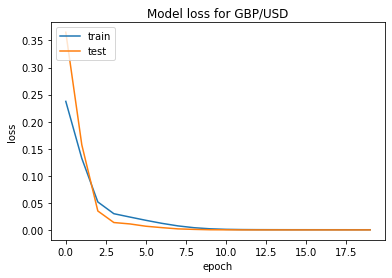

In [19]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss for GBP/USD')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [20]:
#Prediction using the trained model
scaler.scale_

array([1.94855807])

In [21]:
y_pred = model.predict(x_test)
y_pred = scaler.inverse_transform(y_pred)
# print first 10 values
print(y_pred[:10])

[[1.5429187]
 [1.5466694]
 [1.5332683]
 [1.5373157]
 [1.5610126]
 [1.5568805]
 [1.5526519]
 [1.56202  ]
 [1.56202  ]
 [1.5598944]]


In [22]:
#Processing test shape
y_test = np.array(y_test).reshape(-1,1)
y_test = scaler.inverse_transform(y_test)
# print first 10 values
print(y_test[:10])

[[1.5537]
 [1.5415]
 [1.5452]
 [1.5666]
 [1.5629]
 [1.5591]
 [1.5675]
 [1.5675]
 [1.5656]
 [1.5499]]


### Result

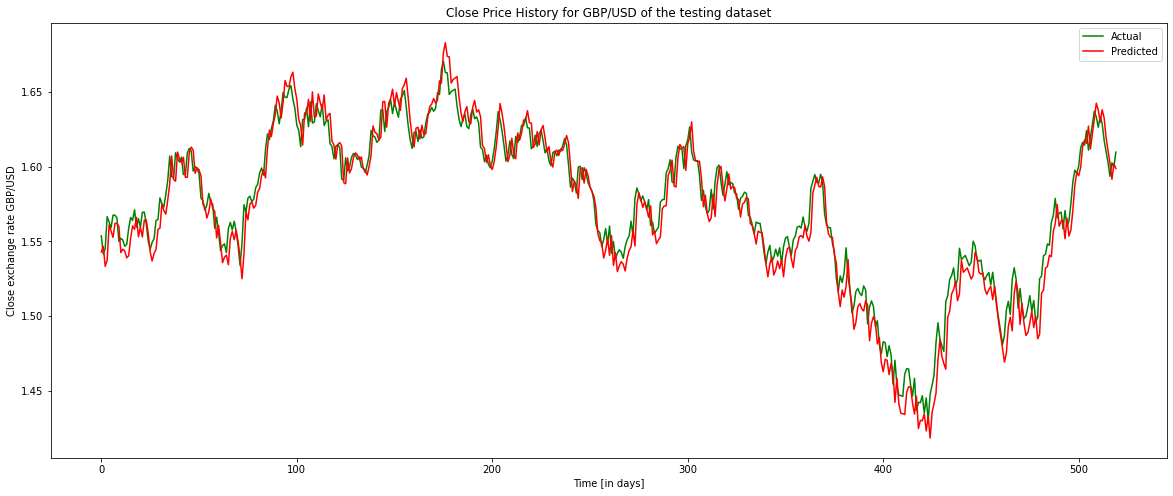

In [23]:
#Visualizing the results
plt.figure(figsize=(20,8))
plt.title('Close Price History for GBP/USD of the testing dataset')
plt.xlabel('Time [in days]')
plt.ylabel('Close exchange rate GBP/USD')
plt.plot(y_test , label = 'Actual', color = 'g')
plt.plot(y_pred , label = 'Predicted', color = 'r')
plt.legend()

In [24]:
from sklearn.metrics import mean_squared_error
print('Mean squared error for GBP/USD rate prediction (3 significant figures): %.3g' % mean_squared_error(y_test, y_pred))

Mean squared error for GBP/USD rate prediction (3 significant figures): 0.000136


## (2) GBP/EUR prediction model

### Data pre-processing

In [25]:
# Load dataset
data_set = pd.read_csv('GBP_EUR.csv')
data_set.head()

,Date,Price,Open,High,Low,Vol.,Change %
0,31/12/2019,1.1831,1.1712,1.1835,1.1693,151.97K,1.06%
1,30/12/2019,1.1707,1.1688,1.1750,1.1685,147.91K,0.08%
2,27/12/2019,1.1698,1.1707,1.1753,1.1673,136.93K,-0.06%
3,26/12/2019,1.1705,1.1686,1.1725,1.1677,130.61K,0.19%
4,25/12/2019,1.1683,1.1676,1.1718,1.1639,51.17K,0.09%


In [26]:
data_set.tail()

,Date,Price,Open,High,Low,Vol.,Change %
2603,07/01/2010,1.1129,1.1110,1.1139,1.1075,NaN,0.10%
2604,06/01/2010,1.1118,1.1128,1.1205,1.1092,NaN,-0.14%
2605,05/01/2010,1.1134,1.1163,1.1183,1.1086,NaN,-0.32%
2606,04/01/2010,1.1170,1.1283,1.1294,1.1147,NaN,-1.05%
2607,01/01/2010,1.1288,1.1275,1.1292,1.1267,NaN,0.05%


In [27]:
data_set.shape

(2608, 7)

In [28]:
# Check datatype for each column
data_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2608 entries, 0 to 2607
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Date      2608 non-null   object 
 1   Price     2608 non-null   float64
 2   Open      2608 non-null   float64
 3   High      2608 non-null   float64
 4   Low       2608 non-null   float64
 5   Vol.      261 non-null    object 
 6   Change %  2608 non-null   object 
dtypes: float64(4), object(3)
memory usage: 142.8+ KB


In [29]:
# Checking for null Values
data_set.isnull().sum()

Date           0
Price          0
Open           0
High           0
Low            0
Vol.        2347
Change %       0
dtype: int64

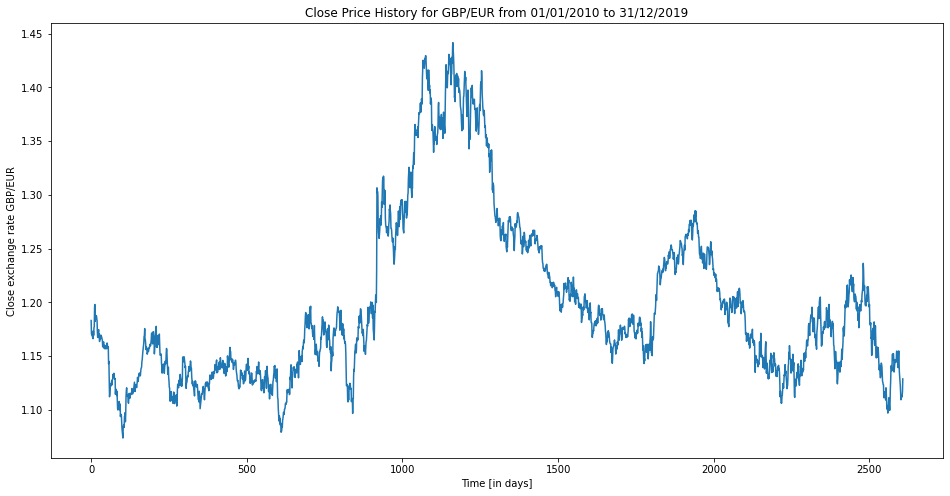

In [30]:
# Plot "Price" GBP/EUR Exchange rate
plt.figure(figsize=(16,8))
plt.title('Close Price History for GBP/EUR from 01/01/2010 to 31/12/2019')
plt.plot(data_set['Price'])
plt.xlabel('Time [in days]')
plt.ylabel('Close exchange rate GBP/EUR')
plt.show()

In [31]:
# Create a data frame for "Price" column as exchange rate
df = data_set['Price']
print(df)

0       1.1831
1       1.1707
2       1.1698
3       1.1705
4       1.1683
         ...  
2603    1.1129
2604    1.1118
2605    1.1134
2606    1.1170
2607    1.1288
Name: Price, Length: 2608, dtype: float64


In [32]:
df = np.array(df).reshape(-1,1)
print(df)

[[1.1831]
 [1.1707]
 [1.1698]
 ...
 [1.1134]
 [1.117 ]
 [1.1288]]


In [33]:
# Scaled the dataset
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df = scaler.fit_transform(df)

### Train - test split

In [34]:
# 80:20 split ratio
train_length = int(len(df) * 0.8)
print('Number of Train data: ', train_length)
train_data, test_data = df[:train_length], df[train_length:]
print('Number of Train and Test data: ', len(train_data), len(test_data))

Number of Train data:  2086
Number of Train and Test data:  2086 522


In [35]:
#Training and test sets, 80:20 ratio split
train = df[:train_length]
test = df[train_length:]
print(train.shape)
print(test.shape)

(2086, 1)
(522, 1)


In [36]:
def get_data(data, look_back):
  datax, datay = [],[]
  for i in range(len(data)-look_back-1):
    datax.append(data[i:(i+look_back),0])
    datay.append(data[i+look_back,0])
  return np.array(datax) , np.array(datay)

In [37]:
# Time lag
look_back = 1

# Training set data
x_train , y_train = get_data(train, look_back)
print(x_train.shape)
print(y_train.shape)

(2084, 1)
(2084,)


In [38]:
# Testing set data
x_test , y_test = get_data(test,look_back)
print(x_test.shape)
print(y_test.shape)

(520, 1)
(520,)


In [39]:
#Processing train and test sets for LSTM model
x_train = x_train.reshape(x_train.shape[0],x_train.shape[1], 1)
x_test = x_test.reshape(x_test.shape[0],x_test.shape[1], 1)
print(x_train.shape)
print(x_test.shape)

(2084, 1, 1)
(520, 1, 1)


In [41]:
n_features=x_train.shape[1]
print("Number of feature:", n_features)
model=Sequential()
model.add(LSTM(100,activation='relu',input_shape=(1,1)))
model.add(Dense(n_features))
model.summary()
#Compiling
model.compile(optimizer='adam', loss = 'mse')
#Training, fit model
history = model.fit(x_train, y_train, epochs = 20, batch_size=32, verbose=1, validation_split= 0.1)

Number of feature: 1
Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_2 (LSTM)                (None, 100)               40800     
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 101       
Total params: 40,901
Trainable params: 40,901
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
59/59 [==============================] - 1s 4ms/step - loss: 0.1199 - val_loss: 0.0553
Epoch 2/20
59/59 [==============================] - 0s 2ms/step - loss: 0.0365 - val_loss: 0.0036
Epoch 3/20
59/59 [==============================] - 0s 1ms/step - loss: 0.0198 - val_loss: 0.0020
Epoch 4/20
59/59 [==============================] - 0s 1ms/step - loss: 0.0138 - val_loss: 0.0014
Epoch 5/20
59/59 [==============================] - 0s 1ms/step - loss: 0.0084 - val_loss: 8.2970e-

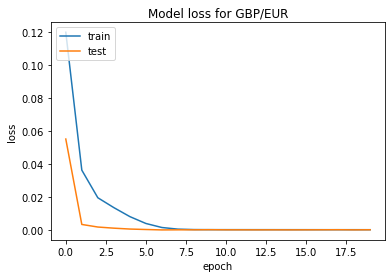

In [42]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss for GBP/EUR')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [43]:
#Prediction using the trained model
scaler.scale_

array([2.71960838])

In [44]:
y_pred = model.predict(x_test)
y_pred = scaler.inverse_transform(y_pred)
# print first 10 values
print(y_pred[:10])

[[1.1949726]
 [1.1960001]
 [1.1856015]
 [1.1902264]
 [1.1943195]
 [1.1926425]
 [1.1910619]
 [1.1965611]
 [1.1969353]
 [1.1930147]]


In [45]:
#Processing test shape
y_test = np.array(y_test).reshape(-1,1)
y_test = scaler.inverse_transform(y_test)
# print first 10 values
print(y_test[:10])

[[1.2006]
 [1.1894]
 [1.1944]
 [1.1988]
 [1.197 ]
 [1.1953]
 [1.2012]
 [1.2016]
 [1.1974]
 [1.1927]]


### Result

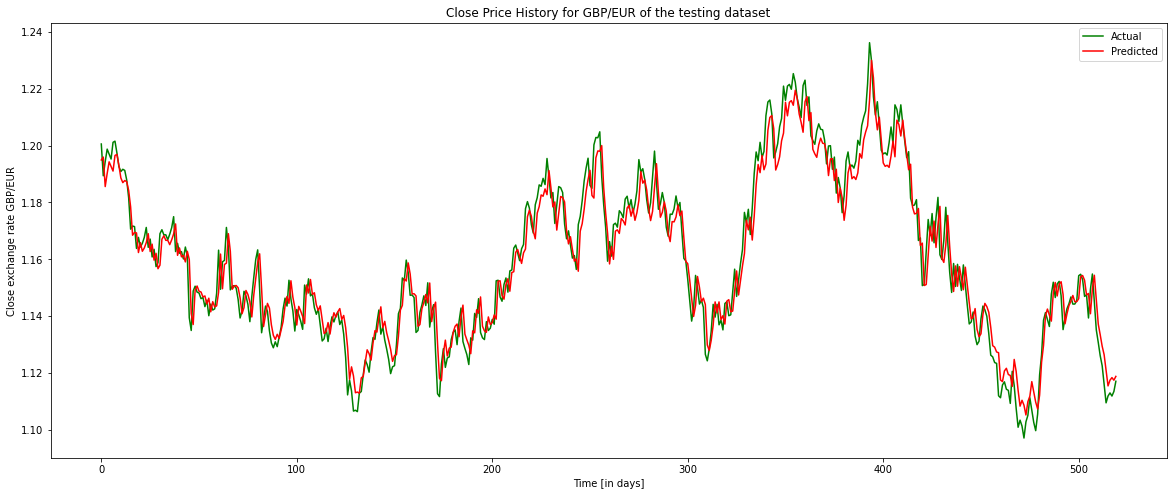

In [46]:
#Visualizing the results
plt.figure(figsize=(20,8))
plt.title('Close Price History for GBP/EUR of the testing dataset')
plt.xlabel('Time [in days]')
plt.ylabel('Close exchange rate GBP/EUR')
plt.plot(y_test , label = 'Actual', color = 'g')
plt.plot(y_pred , label = 'Predicted', color = 'r')
plt.legend()

In [47]:
from sklearn.metrics import mean_squared_error
print('Mean squared error for GBP/EUR rate prediction (3 significant figures): %.3g' % mean_squared_error(y_test, y_pred))

Mean squared error for GBP/EUR rate prediction (3 significant figures): 4.83e-05


## (3) GBP/CHF prediction model

### Data pre-processing

In [48]:
# Load dataset
data_set = pd.read_csv('GBP_CHF.csv')
data_set.head()

,Date,Price,Open,High,Low,Vol.,Change %
0,31/12/2019,1.2840,1.2715,1.2855,1.2685,135.37K,1.03%
1,30/12/2019,1.2709,1.2732,1.2776,1.2691,127.57K,-0.29%
2,27/12/2019,1.2746,1.2751,1.2800,1.2717,115.31K,-0.02%
3,26/12/2019,1.2748,1.2704,1.2770,1.2695,113.83K,0.37%
4,25/12/2019,1.2701,1.2692,1.2741,1.2672,35.20K,0.12%


In [49]:
data_set.tail()

,Date,Price,Open,High,Low,Vol.,Change %
2603,07/01/2010,1.6475,1.6452,1.6512,1.6395,NaN,0.06%
2604,06/01/2010,1.6465,1.6523,1.6638,1.6413,NaN,-0.43%
2605,05/01/2010,1.6536,1.6568,1.6599,1.6459,NaN,-0.26%
2606,04/01/2010,1.6579,1.6729,1.6788,1.6541,NaN,-0.92%
2607,01/01/2010,1.6733,1.6706,1.6737,1.6698,NaN,0.01%


In [50]:
data_set.shape

(2608, 7)

In [51]:
# Check datatype for each column
data_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2608 entries, 0 to 2607
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Date      2608 non-null   object 
 1   Price     2608 non-null   float64
 2   Open      2608 non-null   float64
 3   High      2608 non-null   float64
 4   Low       2608 non-null   float64
 5   Vol.      256 non-null    object 
 6   Change %  2608 non-null   object 
dtypes: float64(4), object(3)
memory usage: 142.8+ KB


In [52]:
# Checking for null Values
data_set.isnull().sum()

Date           0
Price          0
Open           0
High           0
Low            0
Vol.        2352
Change %       0
dtype: int64

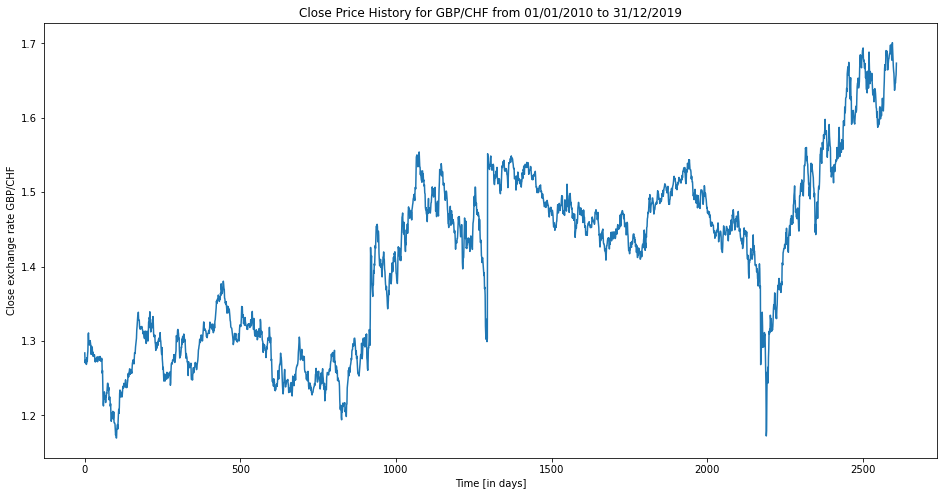

In [53]:
# Plot "Price" GBP/CHF Exchange rate
plt.figure(figsize=(16,8))
plt.title('Close Price History for GBP/CHF from 01/01/2010 to 31/12/2019')
plt.plot(data_set['Price'])
plt.xlabel('Time [in days]')
plt.ylabel('Close exchange rate GBP/CHF')
plt.show()

In [54]:
# Create a data frame for "Price" column as exchange rate
df = data_set['Price']
print(df)

0       1.2840
1       1.2709
2       1.2746
3       1.2748
4       1.2701
         ...  
2603    1.6475
2604    1.6465
2605    1.6536
2606    1.6579
2607    1.6733
Name: Price, Length: 2608, dtype: float64


In [55]:
df = np.array(df).reshape(-1,1)
print(df)

[[1.284 ]
 [1.2709]
 [1.2746]
 ...
 [1.6536]
 [1.6579]
 [1.6733]]


In [56]:
# Scaled the dataset
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df = scaler.fit_transform(df)

### Train - test split

In [57]:
# 80:20 split ratio
train_length = int(len(df) * 0.8)
print('Number of Train data: ', train_length)
train_data, test_data = df[:train_length], df[train_length:]
print('Number of Train and Test data: ', len(train_data), len(test_data))

Number of Train data:  2086
Number of Train and Test data:  2086 522


In [58]:
#Training and test sets, 80:20 ratio split
train = df[:train_length]
test = df[train_length:]
print(train.shape)
print(test.shape)

(2086, 1)
(522, 1)


In [59]:
def get_data(data, look_back):
  datax, datay = [],[]
  for i in range(len(data)-look_back-1):
    datax.append(data[i:(i+look_back),0])
    datay.append(data[i+look_back,0])
  return np.array(datax) , np.array(datay)

In [60]:
# Time lag
look_back = 1

# Training set data
x_train , y_train = get_data(train, look_back)
print(x_train.shape)
print(y_train.shape)

(2084, 1)
(2084,)


In [61]:
# Testing set data
x_test , y_test = get_data(test,look_back)
print(x_test.shape)
print(y_test.shape)

(520, 1)
(520,)


In [62]:
#Processing train and test sets for LSTM model
x_train = x_train.reshape(x_train.shape[0],x_train.shape[1], 1)
x_test = x_test.reshape(x_test.shape[0],x_test.shape[1], 1)
print(x_train.shape)
print(x_test.shape)

(2084, 1, 1)
(520, 1, 1)


In [63]:
n_features=x_train.shape[1]
print("Number of feature:", n_features)
model=Sequential()
model.add(LSTM(100,activation='relu',input_shape=(1,1)))
model.add(Dense(n_features))
model.summary()
#Compiling
model.compile(optimizer='adam', loss = 'mse')
#Training, fit model
history = model.fit(x_train, y_train, epochs = 20, batch_size=32, verbose=1, validation_split= 0.1)

Number of feature: 1
Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_3 (LSTM)                (None, 100)               40800     
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 101       
Total params: 40,901
Trainable params: 40,901
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
59/59 [==============================] - 1s 4ms/step - loss: 0.1242 - val_loss: 0.1419
Epoch 2/20
59/59 [==============================] - 0s 2ms/step - loss: 0.0348 - val_loss: 0.0223
Epoch 3/20
59/59 [==============================] - 0s 1ms/step - loss: 0.0151 - val_loss: 0.0106
Epoch 4/20
59/59 [==============================] - 0s 1ms/step - loss: 0.0124 - val_loss: 0.0090
Epoch 5/20
59/59 [==============================] - 0s 1ms/step - loss: 0.0097 - val_loss: 0.0056
E

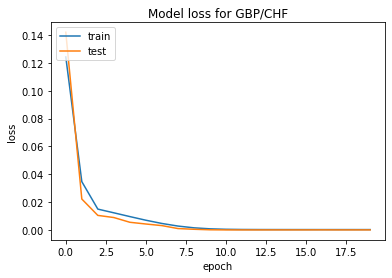

In [64]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss for GBP/CHF')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [65]:
#Prediction using the trained model
scaler.scale_

array([1.88288458])

In [66]:
y_pred = model.predict(x_test)
y_pred = scaler.inverse_transform(y_pred)
# print first 10 values
print(y_pred[:10])

[[1.4564046]
 [1.4555416]
 [1.4467345]
 [1.454787 ]
 [1.4624641]
 [1.4612713]
 [1.459755 ]
 [1.4668124]
 [1.4660503]
 [1.4577003]]


In [67]:
#Processing test shape
y_test = np.array(y_test).reshape(-1,1)
y_test = scaler.inverse_transform(y_test)
# print first 10 values
print(y_test[:10])

[[1.4574]
 [1.4492]
 [1.4567]
 [1.4638]
 [1.4627]
 [1.4613]
 [1.4678]
 [1.4671]
 [1.4594]
 [1.4531]]


### Result

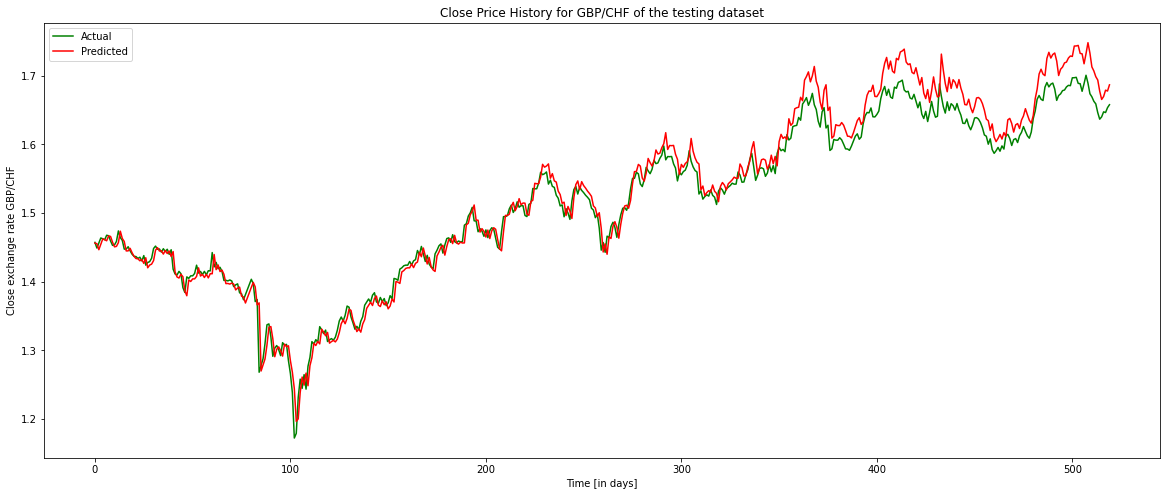

In [68]:
#Visualizing the results
plt.figure(figsize=(20,8))
plt.title('Close Price History for GBP/CHF of the testing dataset')
plt.xlabel('Time [in days]')
plt.ylabel('Close exchange rate GBP/CHF')
plt.plot(y_test , label = 'Actual', color = 'g')
plt.plot(y_pred , label = 'Predicted', color = 'r')
plt.legend()

In [69]:
from sklearn.metrics import mean_squared_error
print('Mean squared error for GBP/CHF rate prediction (3 significant figures): %.3g' % mean_squared_error(y_test, y_pred))

Mean squared error for GBP/CHF rate prediction (3 significant figures): 0.000517
